In [18]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

1. Loading the data

In [2]:
data = pd.read_csv("/Users/surajkwork/Documents/Projects/ab-testing/marketing-campaign.csv")
data.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [4]:
data.shape

(548, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [8]:
data.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [16]:
for column in data.columns:
    print(f" No. of unique values for {column}: {data[column].nunique()}")

 No. of unique values for MarketID: 10
 No. of unique values for MarketSize: 3
 No. of unique values for LocationID: 137
 No. of unique values for AgeOfStore: 25
 No. of unique values for Promotion: 3
 No. of unique values for week: 4
 No. of unique values for SalesInThousands: 517


2. Exploration

Checking sales distribution across promotions.

In [17]:
SalesDist = data.groupby('Promotion')['SalesInThousands'].sum().reset_index()
SalesDist['Percentage'] = round((SalesDist['SalesInThousands'] / SalesDist['SalesInThousands'].sum()) * 100)


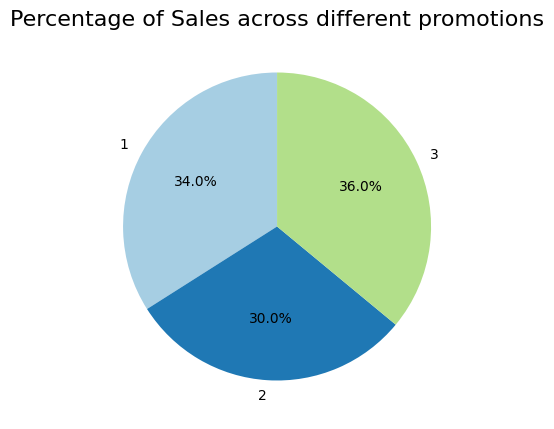

In [19]:
fig, ax = plt.subplots(figsize=(5, 5))   
ax.pie(SalesDist['Percentage'], labels=SalesDist['Promotion'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
ax.set_title("Percentage of Sales across different promotions", fontsize=16)
plt.show()